In [1]:
# ====================  ==============
# In this notebook I will try to implement the model in 
# the paper "Estimating the Uncertainty of Average F1 Score"
# (Dell Zhang 2015)
# ====================  ==============
import numpy as np
import pymc as pm
data = np.array([[145,1,2,1,0],[5,256,22,9,6],[5,24,234,36,19],[1,18,32,243,25],[1,5,9,38,254]])
n_class = np.array([np.sum(i) for i in data])
D = np.sum(data)

 [-----------------100%-----------------] 25000 of 25000 complete in 2.2 secPlotting p


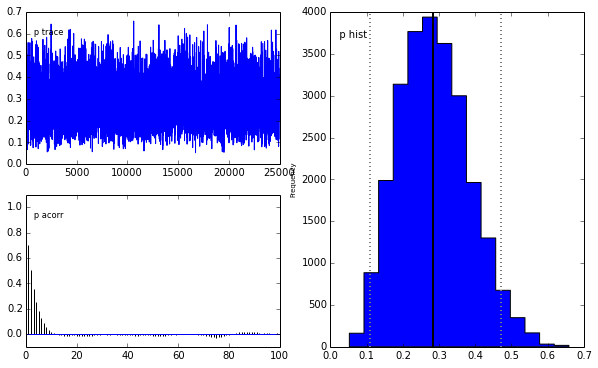

In [4]:
# a simple demo for Binomal-Beta Conjugate
p = pm.Beta("p",alpha=1,beta=1)
n = pm.Binomial("Bino",n=19,p=p,value=5,observed=True)
mcmc = pm.MCMC([n,p])
mcmc.sample(25000)

%matplotlib inline
from pymc.Matplot import plot as mcplot
mcplot(mcmc.trace("p"),common_scale=False)


 [-----------------100%-----------------] 25000 of 25000 complete in 26.5 secPlotting theta_1_0
Plotting theta_1_1
Plotting theta_1_2
Plotting theta_1_3
Plotting precision


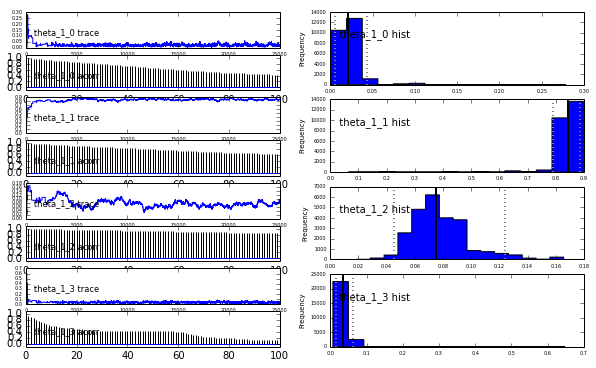

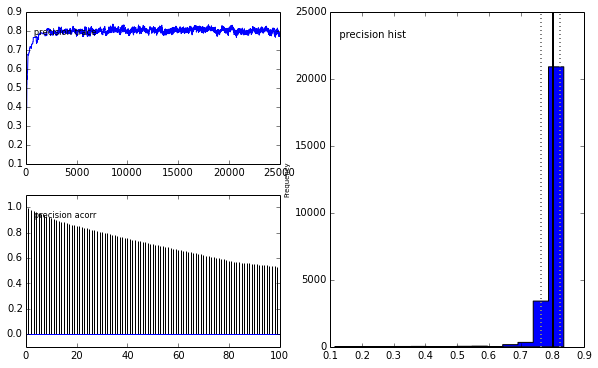

In [5]:
# a simple demo for Dirichlet-Multinomal Conjugate
N = 5 # dimension
beta = np.ones(N)
mu=pm.Dirichlet("mu", theta=beta)
cmu = pm.CompletedDirichlet("cmu", D=mu)

n = pm.Multinomial('n', n=D, p=cmu, value=n_class, observed=True)

alpha = np.ones(N)

theta = pm.Container([pm.Dirichlet("theta_%s" % i,theta=alpha) \
                      for i in range(N)])
ctheta = pm.Container([pm.CompletedDirichlet("ctheta_%s" % i, D=theta[i]) for i in range(N)])
c = pm.Container([pm.Multinomial("c_%s" % i, n=n_class[i], p=theta[i]\
                                ,value = data[i], observed=True)\
                 for i in range(N)])

@pm.deterministic
def precision(mu=cmu, theta=ctheta):
    return np.sum([mu[0][i]*theta[i][0][i] for i in range(N)])


mcmc = pm.MCMC([n,mu,theta,c,precision])
mcmc.sample(25000)

%matplotlib inline
from pymc.Matplot import plot as mcplot
mcplot(mcmc.trace("theta_1"),common_scale=False)
mcplot(mcmc.trace(precision),common_scale=False)